In [1]:
from google.colab import drive

In [2]:
print("Get Google Drive access")
drive.mount('/content/drive')

Get Google Drive access
Mounted at /content/drive


In [ ]:
print("Installing Tensorflow and Keras libraries")
!pip install tensorflow
!pip install keras-tuner

Installing Tensorflow and Keras libraries
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
print("Importing modules")
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import seaborn as sns
import io
import json
import matplotlib.pyplot as plt

Importing modules


In [ ]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from tensorflow.keras.utils import pad_sequences
from numpy import asarray
from numpy import zeros
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import tokenizer_from_json

In [ ]:
print("Downloading nltk stopwords and wordnet")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
print("Get IMDB database")
movie_reviews = pd.read_csv("Path of a1_IMDB_Dataset.csv")

Get IMDB database


In [ ]:
print("Shape of dataset table")
movie_reviews.shape

Shape of dataset table


(50000, 2)

In [ ]:
print("First 5 rows of table")
movie_reviews.head(5)

First 5 rows of table


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
print("Is there null value inside data?: " + str(movie_reviews.isnull().values.any()))

Is there null value inside data?: False


<Axes: xlabel='sentiment', ylabel='count'>

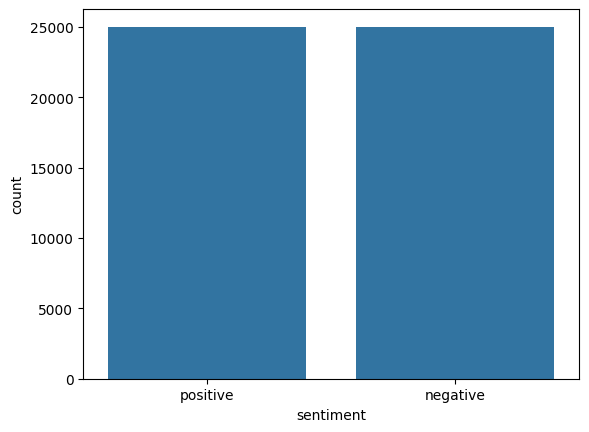

In [ ]:
sns.countplot(x='sentiment', data=movie_reviews)

In [ ]:
movie_reviews["review"][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [ ]:
stopwords_list = set(stopwords.words('english'))

In [ ]:
stopwords_list

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

class CustomPreprocess():

    def __init__(self):
        pass

    def preprocess_text(self,sen):
        sen = sen.lower()

        sentence = remove_tags(sen)

        sentence = re.sub('[^a-zA-Z]', ' ', sentence)

        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
        sentence = re.sub(r'\s+', ' ', sentence)

        pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
        sentence = pattern.sub('', sentence)

        return sentence

In [ ]:
custom = CustomPreprocess()
custom.preprocess_text("Those were the best days of my life!")

'best days life '

In [ ]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(custom.preprocess_text(sen))

In [ ]:
X[2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends '

In [ ]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
y.shape[0]

50000

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
tokenizer_json = word_tokenizer.to_json()
with io.open('Path of edited_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

92394

In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
embeddings_dictionary = dict()
glove_file = open('Path of a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()


In [ ]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(92394, 100)

In [ ]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     9,239,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,239,400 (35.25 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,239,400 (35.25 MB)

None


In [ ]:
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 79s 305ms/step - acc: 0.6924 - loss: 0.5751 - val_acc: 0.8029 - val_loss: 0.4370
Epoch 2/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 85s 320ms/step - acc: 0.8047 - loss: 0.4229 - val_acc: 0.8361 - val_loss: 0.3867
Epoch 3/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 320ms/step - acc: 0.8363 - loss: 0.3795 - val_acc: 0.8524 - val_loss: 0.3583
Epoch 4/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 78s 305ms/step - acc: 0.8538 - loss: 0.3400 - val_acc: 0.8135 - val_loss: 0.3930
Epoch 5/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 319ms/step - acc: 0.8614 - loss: 0.3316 - val_acc: 0.8630 - val_loss: 0.3266
Epoch 6/6
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 319ms/step - acc: 0.8735 - loss: 0.3020 - val_acc: 0.8700 - val_loss: 0.3131


In [ ]:
score = lstm_model.evaluate(X_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - acc: 0.8591 - loss: 0.3158


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3139553964138031
Test Accuracy: 0.8615999817848206


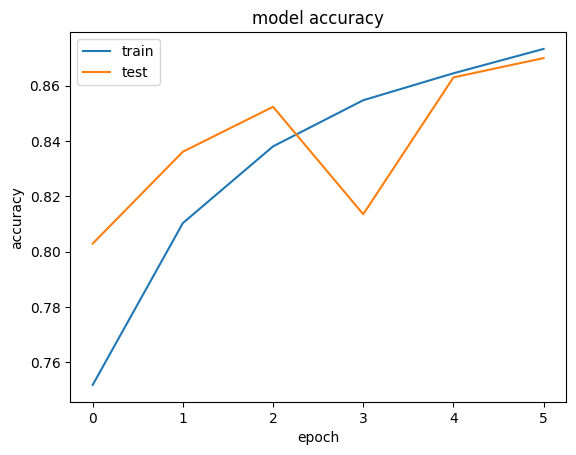

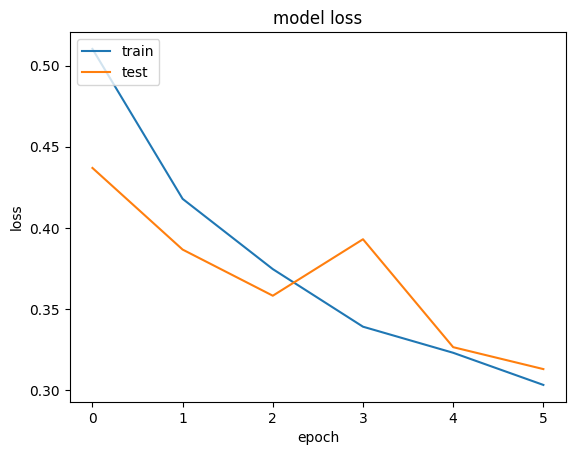

In [ ]:
plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
lstm_model.save(f"Results/lstm_model_{round(score[1], 3)}.h5", save_format='h5')

In [ ]:
model_path ='/content/Results/name of your new model file'
pretrained_lstm_model = load_model(model_path)
pretrained_lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (128, 100, 100)        │     9,239,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (128, 128)             │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (128, 1)               │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,356,779 (35.69 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 9,239,400 (35.25 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
reviews = [
    "The event was incredibly smooth. I had a blast!",
    "Really enjoyed it, well organized, well done!",
    "The race was amazing, I would totally do it again!",
    "I regret attending. It wasn’t what I expected.",
    "The hotel was exceptional. Highly recommend staying there.",
    "Best conference hands down, couldn’t have asked for more!",
    "It was fun, but it could have been better.",
    "I’d give it a 7/10. It was alright, but not great.",
    "Absolutely loved it. A+ all the way!",
    "My friend also loved it. We both had a great time.",
    "Next time, I’d love more opportunities to network and engage.",
    "I’m indifferent about the whole experience.",
    "I had a positive experience overall. Very pleased.",
    "It wasn’t terrible, but I didn’t enjoy it much.",
    "I’ll pass next time. Definitely not for me.",
    "Total waste of time. I won’t be back.",
    "I’m sad it ended, I was enjoying myself.",
    "It was good, but not great. B+ rating.",
    "Disappointing experience, honestly.",
    "This event was a huge failure in my opinion.",
    "I’d rate it a 4 or 5 out of 10. It wasn’t up to par.",
    "It felt like a total fail.",
    "This was the best thing I’ve ever attended. I’m in shock!",
    "I’d love to see more variety in the food selection next time.",
    "This wasn’t worth my time. Never again.",
    "Next time, I’ll bring someone else to join the fun.",
    "Hey there, how are you doing today?",
    "I’m feeling great, thanks for asking!",
    "Spent the whole day cleaning up. Now I’m exhausted.",
    "I ran 20 miles today and I can barely walk.",
    "That experience was amazing. I’m speechless.",
    "Unbelievable, I’m still thinking about it.",
    "You’re doing an incredible job, keep it up!",
    "You have such a good vibe. Keep shining!",
    "He has such a striking look, don’t you think?",
    "This character is badly designed, I’m not a fan.",
    "I’m ready to play again! It’s so much fun.",
    "The spice level was off the charts, but I loved it!",
    "It had just the right amount of spice. Perfect.",
    "I felt really disconnected from the experience.",
    "Something was missing. I wasn’t satisfied.",
    "The Mortal Kombat game was a thrill to play!",
    "I really enjoy coding in Python. It’s my favorite language.",
    "Spring is my favorite. Everything feels so fresh.",
    "Summer is the best time to relax and enjoy.",
    "Winter is the perfect time for cozy activities.",
    "Autumn is so calming, I love the vibe.",
    "You look stunning today!",
    "Being a nurse is such a rewarding profession.",
    "I know the Earth isn’t flat, the evidence is clear.",
    "Thanos had some interesting points, even if controversial.",
    "Marvel is hands down my favorite, DC can’t compare.",
    "Barry, run faster! You can do it!",
    "Love conquers all, it’s the most important thing.",
    "I really hate that kind of thing. Can’t stand it.",
    "I feel like I’m stuck in a void. Everything feels empty.",
    "There’s nothing really happening. I feel nothing.",
    "It feels pointless, like everything is just null.",
    "There’s just nothing here. Feels like a void."
]

In [ ]:
with open('Path of edited_tokenizer.json') as f:
    data = json.load(f)
    loaded_tokenizer = tokenizer_from_json(data)

In [ ]:
unseen_tokenized = loaded_tokenizer.texts_to_sequences(reviews)

In [ ]:
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=100)

In [ ]:
unseen_sentiments = pretrained_lstm_model.predict(unseen_padded)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


In [ ]:
final_results = np.round(unseen_sentiments*10,1)

In [ ]:
df_prediction_sentiments = pd.DataFrame(final_results, columns = ['Rate'])

In [ ]:
df_review_text = pd.DataFrame(reviews, columns = ['Text'])

In [ ]:
sentiment_categories = []
for sentiment_score in final_results:
    if sentiment_score > 8.49:
        sentiment_categories.append("Positive")
    elif sentiment_score >= 5.0:
        sentiment_categories.append("Neutral")
    else:
        sentiment_categories.append("Negative")

In [ ]:
df_sentiment = pd.DataFrame(sentiment_categories, columns = ['Sentiment'])

In [ ]:
dfx=pd.concat([df_review_text, df_prediction_sentiments, df_sentiment], axis=1)

In [ ]:
dfx

,Text,Rate,Sentiment
0,The event was incredibly smooth. I had a blast!,9.6,Positive
1,"Really enjoyed it, well organized, well done!",9.4,Positive
2,"The race was amazing, I would totally do it ag...",5.0,Neutral
3,I regret attending. It wasn’t what I expected.,5.1,Neutral
4,The hotel was exceptional. Highly recommend st...,9.7,Positive
5,"Best conference hands down, couldn’t have aske...",7.6,Neutral
6,"It was fun, but it could have been better.",5.5,Neutral
7,"I’d give it a 7/10. It was alright, but not gr...",5.9,Neutral
8,Absolutely loved it. A+ all the way!,6.6,Neutral
9,My friend also loved it. We both had a great t...,9.6,Positive
